In [428]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [429]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [430]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [431]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temp_june = (extract('month', Measurement.date) == 6)

results = []

results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date, temp_june).all()




In [432]:
#  3. Convert the June temperatures to a list.

june = list(np.ravel(results))
#print(june)


In [433]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(results, columns = ["date",'Temps'])

june_df.set_index(june_df['date'], inplace = True)

june_df['Temps'].head()




date
2010-06-01    78.0
2010-06-02    76.0
2010-06-03    78.0
2010-06-04    76.0
2010-06-05    77.0
Name: Temps, dtype: float64

In [434]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [435]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temp_december = (extract('month', Measurement.date) == 12)

dec_results = []

#results = (Measurement.date, Measurement.tobs).\
    #filter(extract('month',Measurement.date)== 0)

dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date, temp_december).all()

In [436]:
# 7. Convert the December temperatures to a list.

december = list(np.ravel(results))

In [437]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=["date","Temps"])
dec_df.set_index(dec_df['date'], inplace = True)

dec_df['Temps'].head()

date
2010-12-01    76.0
2010-12-03    74.0
2010-12-04    74.0
2010-12-06    64.0
2010-12-07    64.0
Name: Temps, dtype: float64

In [438]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [439]:
dec_df = dec_df.sort_index()


<AxesSubplot:ylabel='Frequency'>

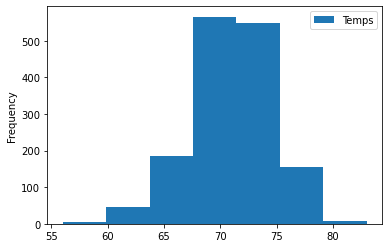

In [440]:

dec_df.plot.hist(bins = 7)

In [441]:
june_df = june_df.sort_index()


<AxesSubplot:ylabel='Frequency'>

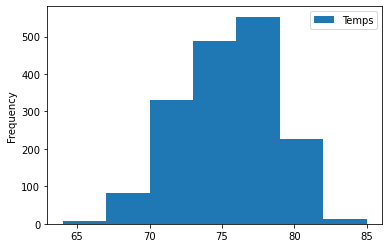

In [442]:
june_df.plot.hist(bins = 7)

In [443]:
temp_march = (extract('month', Measurement.date) == 3)

results = []

results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date, temp_march).all()

march = list(np.ravel(results))

march_df = pd.DataFrame(results, columns = ["date",'Temps'])

march_df.set_index(march_df['date'], inplace = True)

march_df['Temps'].head()

march_df.describe()



,Temps
count,1693.000000
mean,70.059067
std,3.845271
min,56.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,82.000000


<AxesSubplot:ylabel='Frequency'>

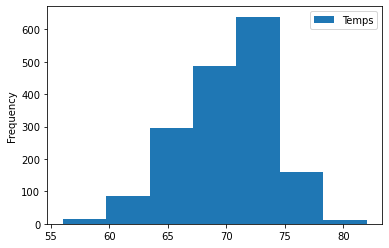

In [444]:
march_df = march_df.sort_index()

march_df.plot.hist(bins = 7)

In [479]:
temp_sept = (extract('month', Measurement.date) == 9)

results = []

results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date, temp_sept).all()

sept = list(np.ravel(results))

sept_df = pd.DataFrame(results, columns = ["date",'Temps'])

sept_df.set_index(sept_df['date'], inplace = True)

sept_df['Temps'].head()

sept_df.describe()

sept_df


,date,Temps
date,,
2010-09-01,2010-09-01,77.0
2010-09-02,2010-09-02,76.0
2010-09-03,2010-09-03,78.0
2010-09-04,2010-09-04,77.0
2010-09-05,2010-09-05,77.0
...,...,...
2016-09-26,2016-09-26,74.0
2016-09-27,2016-09-27,74.0
2016-09-28,2016-09-28,77.0


<AxesSubplot:ylabel='Frequency'>

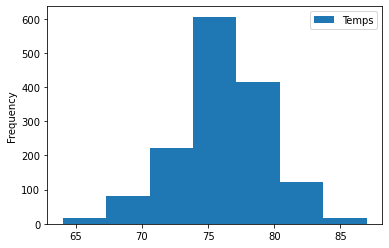

In [480]:
sept_df = sept_df.sort_index()

sept_df.plot.hist(bins = 7)

In [515]:
sept_count = sept_df.groupby(["Temps"]).count()['date']
march_count = march_df.groupby(["Temps"]).count()['date']
june_count = june_df.groupby(["Temps"]).count()['date']
dec_count = dec_df.groupby(["Temps"]).count()['date']




In [492]:


sept_count_df = pd.DataFrame({'Sept':sept_count})
#Total Drivers
march_count_df = pd.DataFrame({'March':march_count})
#march_count_df.set_index(march_df['temp'], inplace = True)

#TotalFares
june_count_df = pd.DataFrame({'June' : june_count})
#june_count_df.set_index(june_df['temp'], inplace = True)

#Average Fare per Ride
dec_count_df = pd.DataFrame({"December": dec_count})
#dec_count_df.set_index(dec_df['temp'], inplace = True)



summary_df = pd.merge(march_count_df, june_count_df, on = "Temps", how="left")

summary_df=summary_df.merge(sept_count_df, on = "Temps" , how="left")

summary_df=summary_df.merge(dec_count_df, on = "Temps", how="left")

summary_df= summary_df.dropna()

#summary_df = pd.merge(summary_df, sept_df, on = "Temps", how="left")



summary_df


,March,June,Sept,December
Temps,,,,
64.0,34,1.0,1.0,28
66.0,91,3.0,5.0,45
67.0,110,10.0,12.0,68
68.0,129,23.0,21.0,99
69.0,174,49.0,28.0,144
70.0,185,82.0,32.0,149
71.0,163,97.0,51.0,174
72.0,195,152.0,70.0,166
73.0,156,145.0,100.0,148


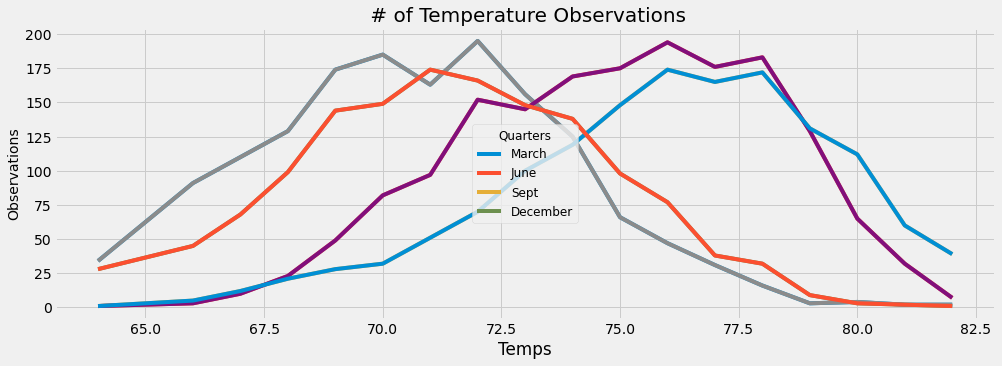

In [524]:
import numpy as np
import matplotlib.pyplot as plt


ax = summary_df.plot(figsize=(15,5))


#ax.set_yticks(np.arange(0,200, step = 5))

ax.set_title(" # of Temperature Observations", fontsize=20)

ax.set_ylabel('Observations',fontsize=14)


ax.plot(summary_df)


# Create a legend

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc= "center", title="Quarters")

lgnd.legendHandles[0]._sizes = [75]

lgnd.legendHandles[1]._sizes = [75]

lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

#Add grid

plt.grid(True)
plt.style.use('fivethirtyeight')


#Save Figure
#plt.savefig("analysis/Total Fare By City.png")

#Show Plot
plt.show()

<AxesSubplot:xlabel='Temps'>

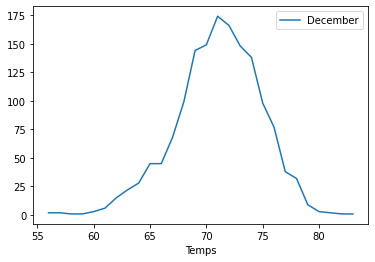

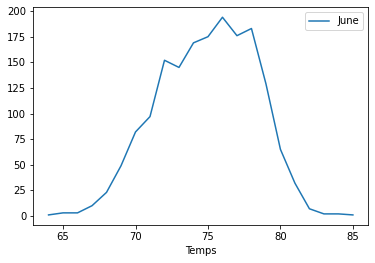

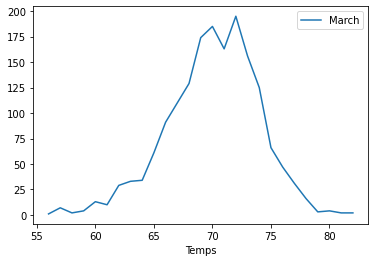

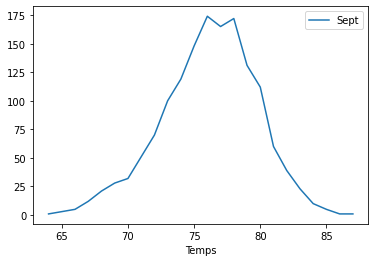

In [483]:
dec_count_df.plot(),
june_count_df.plot(),
march_count_df.plot(),
sept_count_df.plot()

<AxesSubplot:ylabel='Frequency'>

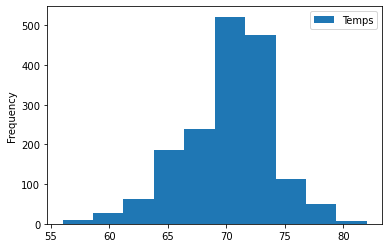

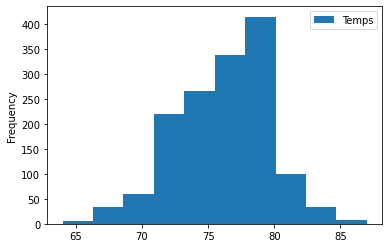

In [451]:
march_df.plot.hist(),
sept_df.plot.hist()